Change your Summoner Name. It is an array when you have changed you name. 
The first name has to be the name that you choose to download the matches with the executable

In [17]:
import json

matches = []

summonerName = ['bertthenerd', 'camen6ert']


with open(summonerName[0] + '.json', 'r') as f:
    mylist = list(f)

    for l in mylist:
        matches.append(json.loads(l))


This statistic shows you your gold graph you earned for every game. So you can suggest how good or bad you perform

CbsRYkK20tPw4EFoZ2tnpvnQBbUsH8PM4pBBIKHqPu8EJy8U


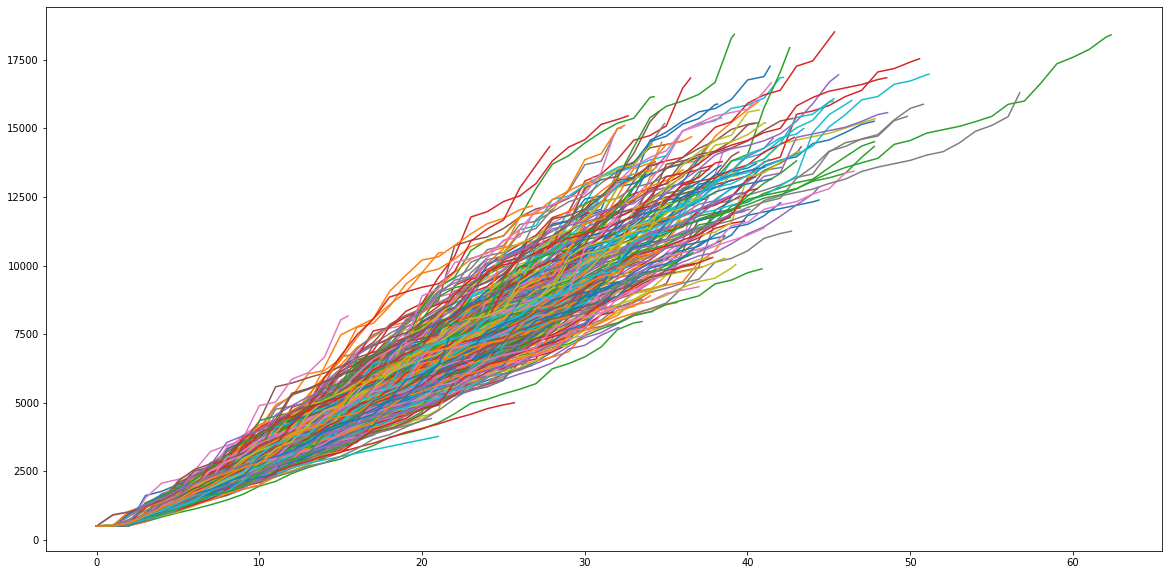

In [18]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

buf = []

#Find SummonerId
parts = matches[0]["match"]['info']["participants"]
summonerId = ""
for p in parts:
    if p["summonerName"] in summonerName:
        summonerId = p["summonerId"]
        break

print(summonerId)

for m in matches:
    if 'info' not in m["match"] or 'info' not in m['timeline']:
        continue 

    gm = m["match"]["info"]["gameMode"]
    if gm != "CLASSIC":
        continue

    parts = m["match"]['info']["participants"]
    
    for p in parts:
        if p["summonerId"] == summonerId:
            i = p["participantId"]
            break

    frames = m['timeline']['info']['frames']

    minions = []

    for frame in frames:
        minions.append((frame["timestamp"] / 60000,  frame['participantFrames'][str(i)]['totalGold']))

    buf.append(minions)


figure(figsize=(20,10))
for b in buf:
    plt.plot(*zip(*b))


This statistics shows you the gold per min you earned per game. If you try to see your regression it should be upwards.

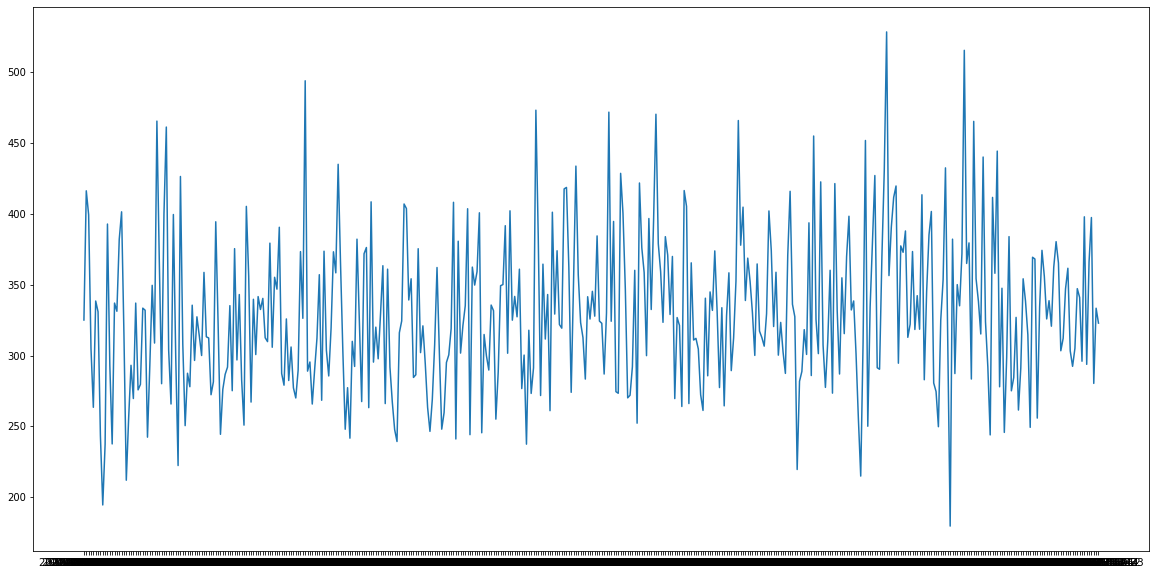

In [20]:
from datetime import datetime
val = []

for m in matches:
    if 'info' not in m["match"] or 'info' not in m['timeline']:
        continue 

    gm = m["match"]["info"]["gameMode"]
    if gm != "CLASSIC":
        continue

    parts = m["match"]['info']["participants"]
    gameStart = m["match"]['info']['gameCreation']
 
 
    gameDurationMin = m["match"]['info']['gameDuration']

    if "gameEndTimestamp" not in m["match"]['info']:
        gameDurationMin = gameDurationMin/1000

    gameDurationMin = gameDurationMin/60

    for p in parts:
        if p["summonerId"] in summonerId:
            val.append((datetime.utcfromtimestamp(gameStart/1000).strftime('%Y-%m-%d %H:%M'), p["goldEarned"]/gameDurationMin))
            continue

val = sorted(val, key=lambda tup: tup[0])
figure(figsize=(20,10))
x, y = zip(*val)
plt.plot(x,y)

The next cell only filter all games that are not ARAM or URF or something else. You can see how many games the statistics use for analysis

In [21]:
summoner = []
i = 0
for m in matches:
    if 'info' not in m["match"] or 'info' not in m['timeline']:
        continue 


    gm = m["match"]["info"]["gameMode"]
    if gm != "CLASSIC":
        continue

    parts = m["match"]['info']["participants"]

    for p in parts:
        if p["summonerId"] == summonerId:
            summoner.append(p)

print(len(summoner))

432


Here you can see the gold earned per min for your champs and how often you played the champ. You can filter this list by changing the 
howOftenPlayedFilter variable so you dont see champs that you played once or twice

<AxesSubplot:xlabel='championName'>

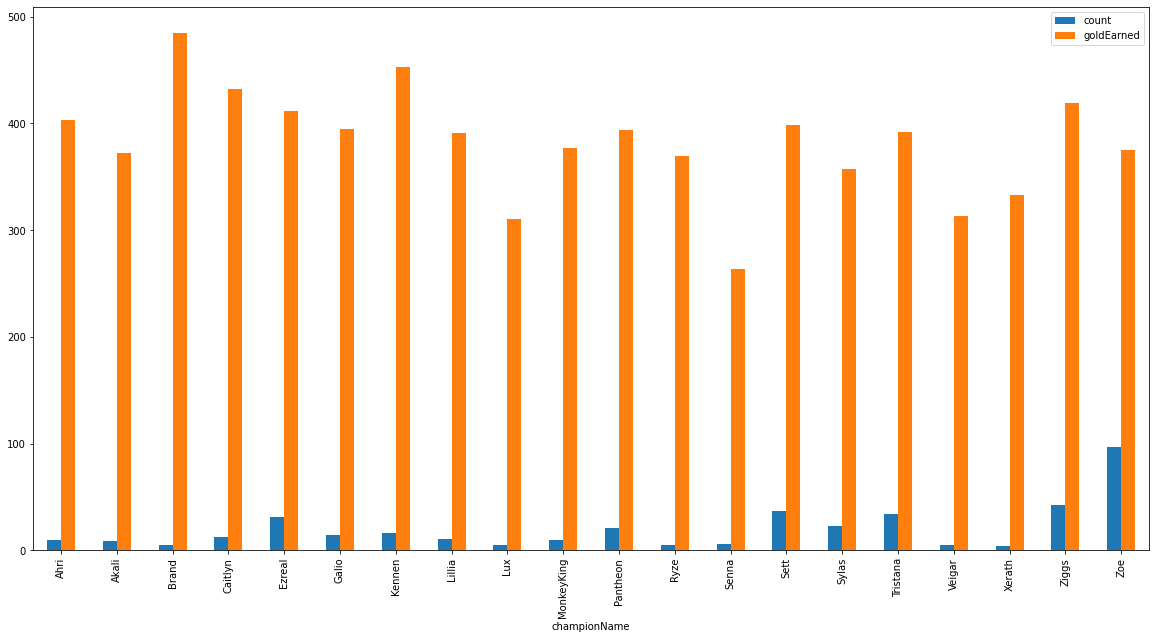

In [23]:
import pandas as pd

howOftenPlayedFilter = 3

df = pd.DataFrame(summoner)

gameDurationMin = m["match"]['info']['gameDuration']
if "gameEndTimestamp" not in m["match"]['info']:
    gameDurationMin = gameDurationMin/1000

gameDurationMin = gameDurationMin/60

df_new = df[['championName', 'goldEarned', 'summonerName']]

dfmean = df_new.groupby('championName').agg({'championName':'size', 'goldEarned':'mean'}).rename(columns={'championName':'count','goldEarned':'goldEarned'})
dfmean = dfmean[dfmean['count'] > howOftenPlayedFilter]

dfmean["goldEarned"] = dfmean["goldEarned"].div(gameDurationMin)
dfmean = dfmean

dfmean.plot.bar(figsize=(20, 10))



Next shows you the winrate per champ

<AxesSubplot:xlabel='championName'>

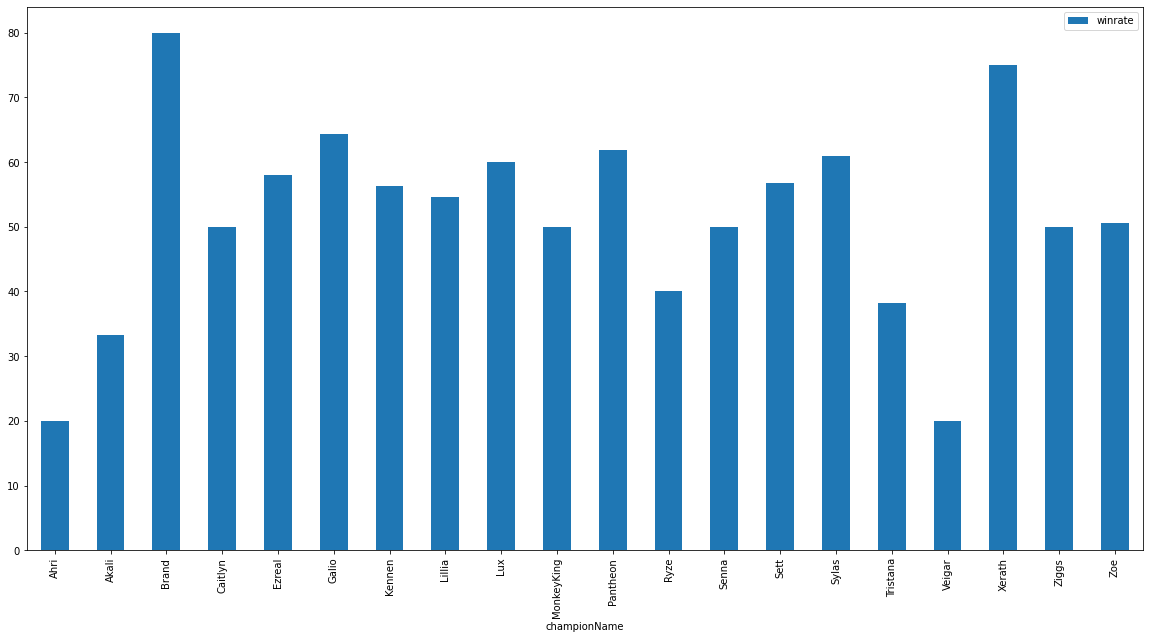

In [25]:
import pandas as pd

df = pd.DataFrame(summoner)

gameDurationMin = m["match"]['info']['gameDuration']
if "gameEndTimestamp" not in m["match"]['info']:
    gameDurationMin = gameDurationMin/1000

gameDurationMin = gameDurationMin/60

df_new = df[['championName', 'win', 'summonerName']]

dfmean = df_new.groupby('championName').agg({'championName':'size', 'win':'sum'}).rename(columns={'championName':'count','win':'win'})
dfmean["winrate"] =  dfmean['win'] * 100 / dfmean['count']
dfmean = dfmean[dfmean['count'] > 3]

dfmean["win"] = dfmean["win"].div(gameDurationMin)
dfmean = dfmean

dfmean[['winrate']].plot.bar(figsize=(20, 10))


This statistics shows you when you lose or win a game. 1 is winning, 0 is loosing

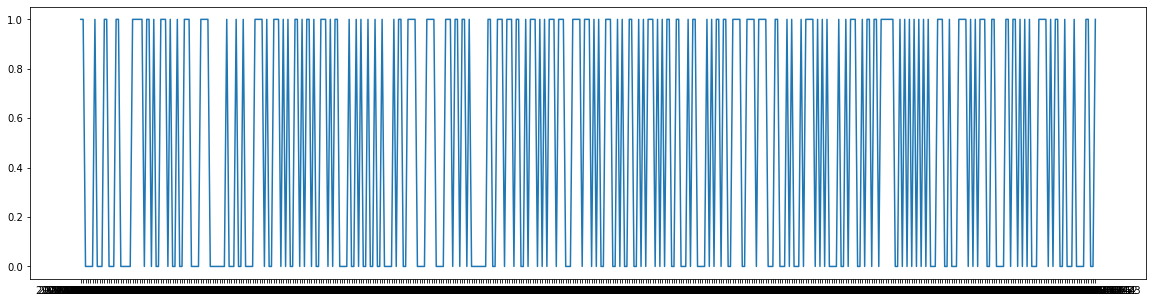

In [26]:
from datetime import datetime
val = []

for m in matches:
    if 'info' not in m["match"] or 'info' not in m['timeline']:
        continue 

    gm = m["match"]["info"]["gameMode"]
    if gm != "CLASSIC":
        continue

    parts = m["match"]['info']["participants"]
    gameStart = m["match"]['info']['gameCreation']

    for p in parts:
        if p["summonerId"] in summonerId:
            val.append((datetime.utcfromtimestamp(gameStart/1000).strftime('%Y-%m-%d %H:%M'), p["win"]))
            continue

val = sorted(val, key=lambda tup: tup[0])
figure(figsize=(20,5))
x, y = zip(*val)
plt.plot(x,y)